
# <b> Image classification with tf.keras

**In this notebook, we will do image classification on [natural images](https://www.kaggle.com/prasunroy/natural-images) dataset**

<b> Importing packages</b>

In [1]:
import tensorflow as tf
import cv2
print(tf.__version__)

2.3.0-dev20200516


**Loading data**

In [2]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-data-sets/42780/75676/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589945376&Signature=snPQE5tttzBYe3R%2BbPIuoXtv7tOvdMw5FY6mqiuHGk8kb4D57pU7DqD3TiqsrR0iu9hibbYNSf5wC3O6WQv3ottjW90CFuw5xdEiOy15XQWIPnuHqRRJBmm%2F%2BChsjHmcvogCjQVoVcIuJjflOTveSPEXqRwrejyah4f%2FolTorcNdZbEJSOBKSD4QBoefu4ylwKt8NExvDZdp01loNs5NVDfc2sD0H0ziUqEb%2FcTyULhVyuOns1lUURK1PVRpvV9KkBU%2F73BEC2sbGzKwnKPd6DVp1ZIajyBh%2FlVNnnlsrM7Ev2pruH1JOFjosEkRaWQhTC1UwfKtDXe7XFYiOfANKg%3D%3D&response-content-disposition=attachment%3B+filename%3Dnatural-images.zip" -c -O 'natural-images.zip'

--2020-05-17 03:33:09--  https://storage.googleapis.com/kaggle-data-sets/42780/75676/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589945376&Signature=snPQE5tttzBYe3R%2BbPIuoXtv7tOvdMw5FY6mqiuHGk8kb4D57pU7DqD3TiqsrR0iu9hibbYNSf5wC3O6WQv3ottjW90CFuw5xdEiOy15XQWIPnuHqRRJBmm%2F%2BChsjHmcvogCjQVoVcIuJjflOTveSPEXqRwrejyah4f%2FolTorcNdZbEJSOBKSD4QBoefu4ylwKt8NExvDZdp01loNs5NVDfc2sD0H0ziUqEb%2FcTyULhVyuOns1lUURK1PVRpvV9KkBU%2F73BEC2sbGzKwnKPd6DVp1ZIajyBh%2FlVNnnlsrM7Ev2pruH1JOFjosEkRaWQhTC1UwfKtDXe7XFYiOfANKg%3D%3D&response-content-disposition=attachment%3B+filename%3Dnatural-images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358905792 (342M) [application/zip]
Saving to: ‘natural-images.zip’

natural-images.zip  100%[===================>] 3

Downloading data using curlwget extension.

**Unzipping data**

In [0]:
from zipfile import ZipFile

zip_file = ZipFile('natural-images.zip', 'r')

zip_file.extractall('data')

In [2]:
!ls data/natural_images

airplane  car  cat  dog  flower  fruit	motorbike  person


Downloaded data has 6 folders i.e, airplane , car , cat , dog , flower , fruit , motorbike , person

In [3]:
dir_path='data/natural_images'
import os
for i in os.listdir(dir_path):
  print('No. of images in ',i, 'category is ',len(os.listdir(os.path.join(dir_path,i))))

No. of images in  airplane category is  727
No. of images in  car category is  968
No. of images in  cat category is  885
No. of images in  motorbike category is  788
No. of images in  fruit category is  1000
No. of images in  flower category is  843
No. of images in  dog category is  702
No. of images in  person category is  986


In [0]:
list_of_heights = []
list_of_widths = []
for i in os.listdir(dir_path):
    for image in os.listdir(os.path.join(dir_path,i)):
        img = cv2.imread(os.path.join(os.path.join(dir_path,i),image), cv2.IMREAD_UNCHANGED)
        shape = img.shape
        list_of_heights.append(shape[0])
        list_of_widths.append(shape[1])     

**Plotting histograms of heights of images**

Text(0.5, 1.0, 'heights')

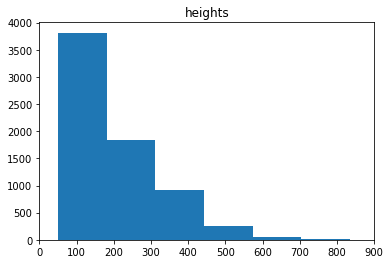

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(list_of_heights,bins=20)
plt.xlim(0,900)
plt.title('heights')

**Plotting histograms of widths of images**

Text(0.5, 1.0, 'widths')

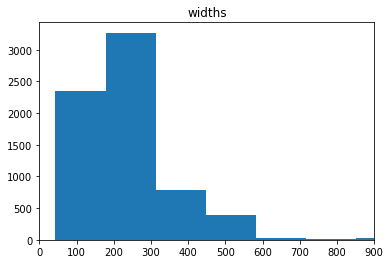

In [6]:
##plotting 
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(list_of_widths,bins=20)
plt.xlim(0,900)
plt.title('widths')

from the above histograms, we can choose height = 156 and width = 256.

In [7]:
image_size=(156,256)
batch_size=32
train_directory = tf.keras.preprocessing.image_dataset_from_directory(dir_path,validation_split=0.2,label_mode='categorical',
                                                                      subset='training',seed=24,
                                                                      image_size = image_size, batch_size = batch_size
                                                                      )
validation_directory = tf.keras.preprocessing.image_dataset_from_directory(dir_path,validation_split=0.2,label_mode='categorical',
                                                                      subset='validation',seed=24,
                                                                      image_size = image_size, batch_size = batch_size
                                                                      )

Found 6899 files belonging to 8 classes.
Using 5520 files for training.
Found 6899 files belonging to 8 classes.
Using 1379 files for validation.


**Creating a dict with keys as class labels and values as class names**

In [0]:
class_labels = {0: 'airplane', 1: 'car',2: 'cat',3: 'dog',4: 'flower',5: 'fruit',6: 'motorbike', 7:'person'}

**Visualizing data**

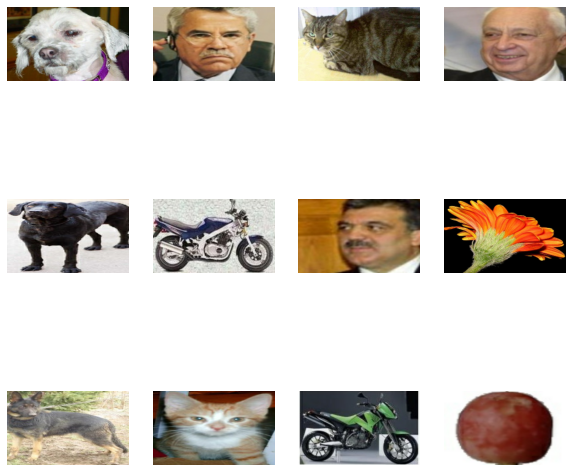

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))
for images,labels in train_directory.take(1):
  for i in range(12):
    ax= plt.subplot(3,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.axis("off")

In [10]:
!ls data/natural_images

airplane  car  cat  dog  flower  fruit	motorbike  person


**Data Augmentation**

In [0]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)


**Visualizing the augmented images**

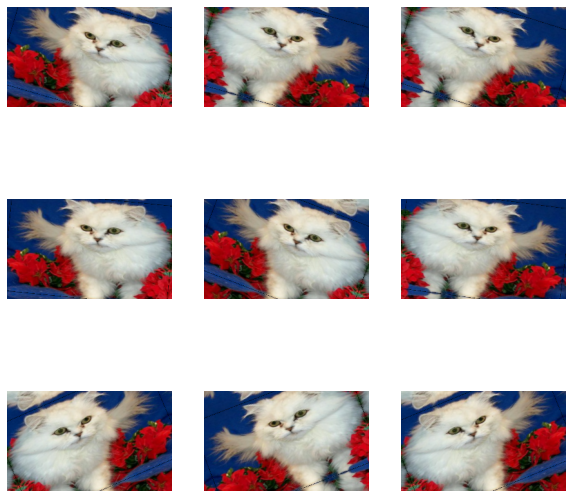

In [16]:
plt.figure(figsize=(10,10))
for image,labels in train_directory.take(1):
  for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_image[0].numpy().astype('uint8'))
    plt.axis('off')

**Configure dataset for performance**

In [0]:
train_directory = train_directory.prefetch(buffer_size = 32)
validation_directory = train_directory.prefetch(buffer_size = 32)

**Baseline model**

In [0]:
tf.keras.backend.clear_session()

In [19]:
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(156,256,3))

x = data_augmentation(inputs)

x = layers.experimental.preprocessing.Rescaling(1.0/255)(x)

x = layers.Conv2D(64,3,activation='relu',strides=2)(x)

x = layers.Conv2D(64, 3, activation='relu',padding="same")(x)

x= layers.Flatten()(x)

output= layers.Dense(8 , activation='softmax')(x)

model = tf.keras.Model(inputs, output)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 156, 256, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 156, 256, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 156, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 77, 127, 64)       1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 77, 127, 64)       36928     
_________________________________________________________________
flatten (Flatten)            (None, 625856)            0         
_________________________________________________________________
dense (Dense)                (None, 8)                

In [20]:
history=model.fit(train_directory,validation_data= validation_directory,epochs = 6)

Epoch 1/6
173/173 [==============================] - 16s 93ms/step - loss: 1.4978 - accuracy: 0.6364 - val_loss: 0.5496 - val_accuracy: 0.8025
Epoch 2/6
173/173 [==============================] - 17s 97ms/step - loss: 0.4978 - accuracy: 0.8274 - val_loss: 0.3791 - val_accuracy: 0.8623
Epoch 3/6
173/173 [==============================] - 17s 97ms/step - loss: 0.4377 - accuracy: 0.8442 - val_loss: 0.3962 - val_accuracy: 0.8583
Epoch 4/6
173/173 [==============================] - 17s 97ms/step - loss: 0.4195 - accuracy: 0.8486 - val_loss: 0.4017 - val_accuracy: 0.8634
Epoch 5/6
173/173 [==============================] - 16s 95ms/step - loss: 0.3566 - accuracy: 0.8763 - val_loss: 0.2765 - val_accuracy: 0.9000
Epoch 6/6
173/173 [==============================] - 16s 95ms/step - loss: 0.3309 - accuracy: 0.8830 - val_loss: 0.2804 - val_accuracy: 0.9016


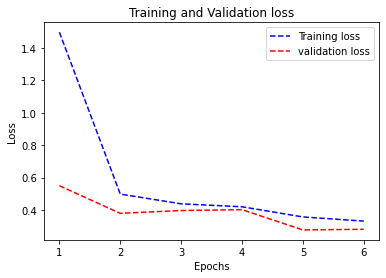

In [21]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,7)
plt.plot(epochs, loss_train, 'b--', label='Training loss')
plt.plot(epochs, loss_val, 'r--', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

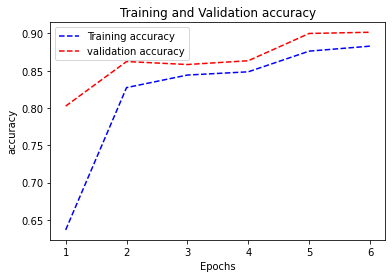

In [22]:
import matplotlib.pyplot as plt
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,7)
plt.plot(epochs, loss_train, 'b--', label='Training accuracy')
plt.plot(epochs, loss_val, 'r--', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Inference for new data point**

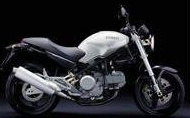


Predicted class : -- motorbike


In [25]:
from IPython.display import Image
display(Image('data/natural_images/motorbike/motorbike_0707.jpg', width=250, height=200))
img = tf.keras.preprocessing.image.load_img(
    "data/natural_images/motorbike/motorbike_0707.jpg", target_size=image_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
predictions = model.predict(img_array)
print('\nPredicted class : --',class_labels[np.argmax(predictions)])

**References**

https://keras.io/examples/vision/image_classification_from_scratch/